# Loading webpage with many dependencies

To load the Minerva homepage at https://minerva.kgi.edu/ your browser needs to get about 100 different files — images, CSS (style sheets), Javascript (code to run), etc.

Assume the amount of time taken to retrieve a single file follows an exponential distribution with parameter λ = 1 / (50 milliseconds). This means the expected (average) waiting time for a single file is 50 ms.

In [1]:
import numpy as np
import seaborn as sns; sns.set()
import scipy.stats as sts
import matplotlib.pyplot as plt

In [2]:
"""
Assume the amount of time taken to retrieve a single file follows 
an exponential distribution with parameter λ = 1 / 50 milliseconds.
"""
lambd = 1 / 50

# What is the 99th percentile waiting time for retrieving a single file?
def exponential_qf(lambd, p):
    return -np.log(1 - p) / lambd

print('99th percentile waiting time for retrieving 1 file:', 
      exponential_qf(lambd, 0.99), 'ms\n', 
      '1st percentile waiting time for retrieving 1 file:',
      sts.expon.ppf(0.01, scale=1/lambd), 'ms')

99th percentile waiting time for retrieving 1 file: 230.25850929940455 ms
 1st percentile waiting time for retrieving 1 file: 0.5025167926750721 ms


99th percentile waiting time for retrieving 100 files: 459.3965934211857 ms
01st percentile waiting time for retrieving 100 files: 154.87293202146944 ms


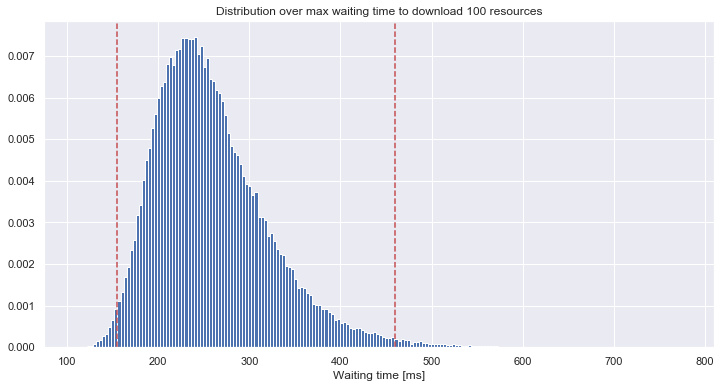

In [3]:
# The 99th percentile waiting time for the entire homepage
trials = 10**5
resources = 100
results = [max(np.random.exponential(scale=1/lambd, size=resources)) 
           for _ in range(trials)]

perc99 = np.percentile(results, 99)
perc01 = np.percentile(results, 1)

print('99th percentile waiting time for retrieving', resources, 'files:', perc99, 'ms')
print('01st percentile waiting time for retrieving', resources, 'files:', perc01, 'ms')

plt.figure(figsize=(12, 6))
plt.hist(results, bins=200, density=True)
plt.title('Distribution over max waiting time to download ' + str(resources) + ' resources')
plt.xlabel('Waiting time [ms]')
ylim = plt.ylim()
plt.plot([perc99, perc99], [0, ylim[1]], 'r--')
plt.plot([perc01, perc01], [0, ylim[1]], 'r--')
plt.ylim(0, ylim[1])
plt.show()

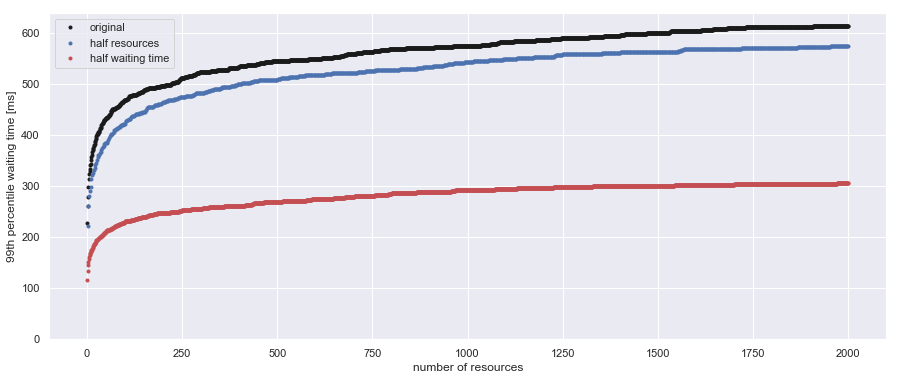

In [7]:
trials = 10**4
resources = 2000

plt.figure(figsize=(15, 6))

plot_data = np.percentile(
    np.maximum.accumulate(
        np.random.exponential(scale=1/lambd, size=(resources, trials)),
        axis=0),
    99, axis=1)
plt.plot(range(1, resources + 1), plot_data, 'k.', label='original')

plot_data = np.percentile(
    np.maximum.accumulate(
        np.random.exponential(scale=1/lambd, size=(resources//2, trials)),
        axis=0),
    99, axis=1)
plt.plot(range(2, resources + 1, 2), plot_data, 'b.', label='half resources')

plot_data = np.percentile(
    np.maximum.accumulate(
        np.random.exponential(scale=1/(2*lambd), size=(resources, trials)),
        axis=0),
    99, axis=1)
plt.plot(range(1, resources + 1), plot_data, 'r.', label='half waiting time')

ylim = plt.ylim()
plt.ylim(0, ylim[1])
plt.xlabel('number of resources')
plt.ylabel('99th percentile waiting time [ms]')
plt.legend()
plt.show()

In [5]:
# Trying the results of the simulation on pivot-sports.com

file_size = np.array([1700, 164, 9300, 25100, 13900, 70, 108000, 193000, 
                      43400, 25300, 7400, 54200, 300000, 122000, 841000])
file_size = file_size / 1000

load_time = np.array([52, 62,63,102,124,124,183,240,252,275,279,298,573,605,673])

print(np.mean(load_time), np.var(load_time), np.median(load_time))

260.3333333333333 38614.48888888889 240.0


99th percentile waiting time for retrieving 15 files: 1901.258687762716 ms
01st percentile waiting time for retrieving 15 files: 346.95447253945133 ms


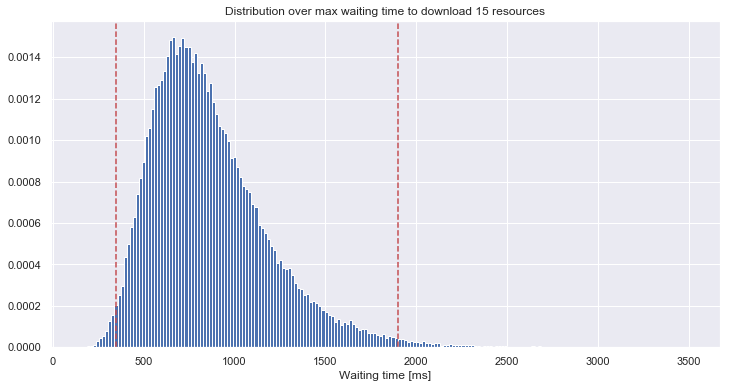

In [6]:
trials = 10**5
resources = len(load_time)
results = [max(np.random.exponential(scale=np.mean(load_time), size=resources)) 
           for _ in range(trials)]

perc99 = np.percentile(results, 99)
perc01 = np.percentile(results, 1)

print('99th percentile waiting time for retrieving', resources, 'files:', perc99, 'ms')
print('01st percentile waiting time for retrieving', resources, 'files:', perc01, 'ms')

plt.figure(figsize=(12, 6))
plt.hist(results, bins=200, density=True)
plt.title('Distribution over max waiting time to download ' + str(resources) + ' resources')
plt.xlabel('Waiting time [ms]')
ylim = plt.ylim()
plt.plot([perc99, perc99], [0, ylim[1]], 'r--')
plt.plot([perc01, perc01], [0, ylim[1]], 'r--')
plt.ylim(0, ylim[1])
plt.show()